In [1]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import typing
import os

%matplotlib notebook

In [2]:
import numpy as np

# переводим файлик в pandas dataframe

In [3]:
def file_to_pd(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df


In [4]:
files_list = sorted(list(i for i in os.listdir(os.getcwd()) if '.txt' in i))
files_list

['W3_40_10_3_periodic_superconductive.txt',
 'W3_40_10_3superconductive.txt',
 'W3_40_10_5_periodic_superconductive.txt',
 'W3_40_10_5superconductive.txt',
 'W3_40_15_3_periodic_superconductive.txt',
 'W3_40_15_3superconductive.txt',
 'W3_40_15_5_periodic_superconductive.txt',
 'W3_40_15_5superconductive.txt',
 'W3_40_5_3_periodic_superconductive.txt',
 'W3_40_5_3superconductive.txt',
 'W3_40_5_5_periodic_superconductive.txt',
 'W3_40_5_5superconductive.txt',
 'W4_40_15_5_periodic_superconductive.txt',
 'W4_40_15_5_superconductive.txt',
 'W5_40_10_10_superconductive.txt',
 'W5_40_13_7_superconductive.txt',
 'W5_40_15_5_superconductive.txt',
 'W5_40_17_3superconductive.txt',
 'W5_40_18_2_superconductive.txt',
 'W5_40_19_1_superconductive.txt']

# Как нарисовать корреляции (без Фурье)

In [5]:
# читаем файл

df = file_to_pd(files_list[4])

# Нумерация узлов на решетке такая:
'''
1	5	9	...
2	6	10	...
3	7	11	...
4	8	12	...
'''
''

''

In [6]:
df[(df.n1 == 100) & (df.n2 == 105)]

,n1,n2,Re,Im
7034,100.0,105.0,0.01366,0.0


# Функция от Tiancheng

(он написал "расчет структурного фактора")

In [12]:
# import numpy as np

# '''
# dx	dy	<Delta⁺_j Delta_i>  --  s-wave
# 0	0	0.43536001696060 + I * 0.00000000000000
# 0	1	0.18038227330943 + I * -0.00000000000000
# 0	2	0.10985737618875 + I * -0.00000000000000
# 0	3	0.18038227330943 + I * 0.00000000000000
# 1	0	0.18038227330943 + I * -0.00000000000000
# 1	1	0.10985737618875 + I * -0.00000000000000
# 1	2	0.11909652058616 + I * -0.00000000000000
# 1	3	0.10985737618875 + I * 0.00000000000000
# 2	0	0.10985737618875 + I * -0.00000000000000
# 2	1	0.11909652058616 + I * -0.00000000000000
# 2	2	0.10341090148926 + I * -0.00000000000000
# 2	3	0.11909652058616 + I * 0.00000000000000
# 3	0	0.18038227330943 + I * 0.00000000000000
# 3	1	0.10985737618875 + I * -0.00000000000000
# 3	2	0.11909652058616 + I * 0.00000000000000
# 3	3	0.10985737618875 + I * 0.00000000000000
# '''

# # data = read_corr(file_out, str_to_find) # read the datafile like above
# # print(data)
# rxs = data[:, 0]
# rys = data[:, 1]
# corrs = data[:, 2]

# lx = 40
# ly = 4
# pi = np.pi
# exp = np.exp
# kxarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / lx)
# kyarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / ly)

# # Sxys = np.full((len(kxarray), len(kyarray)), np.nan)

# # for i_kx, kx in enumerate(kxarray):
# #     for i_ky, ky in enumerate(kyarray):
# #         Sxy = 0
# #         for r, corr in enumerate(corrs):
# #             rx = rxs[r]
# #             ry = rys[r]
# #             Sxy = Sxy + corr * exp(1j * (rx * kx + ry * ky))

# #         Sxys[i_kx, i_ky, i_sz] = Sxy

In [13]:
# len(kxarray)

# График как в Overleaf W = 5, Nup = 15, Ndown = 5

In [15]:
df = file_to_pd('W5_40_15_5_superconductive.txt')

In [16]:
df[(df.n1 == 100) & (df.n2 == 101)]

,n1,n2,Re,Im
14950,100.0,101.0,-0.001917,0.0


## Установим значения параметров

In [28]:
W, L = 5, 40
ctr = W * (L//2) - W//2

In [29]:
def get(df, n1, n2):
    return df[(df.n1 == n1) & (df.n2 == n2)].Re.values

In [30]:
def fourier(df, x0, get=get):
    s = {n_kx:0 for n_kx in range(-L//2 + 1, L//2+1)}
    
    for n_kx in s:
        for i_x in range(L//2):
            kx = 2*np.pi * n_kx / L
            phase = kx * i_x
            term = get(df, x0, x0 + i_x*W) * np.cos(phase) / L
            s[n_kx] += term
    return s

In [31]:
def fourier_2d(df, x0, get=get):
    s = {(n_kx, n_ky) :0 
         for n_kx in range(-L//2 + 1, L//2+1) 
         for n_ky in range(-W//2+1, W//2+1)}
    
    for n_kx, n_ky in s:
        for i_x in range(L//2):
            for i_y in range(W//2+1): # Тут +1 чтобы было три элемента (для нечетных нужен +1)
                kx = 2*np.pi * n_kx / L
                ky = 2*np.pi * n_ky / W

                phase = kx * i_x + ky * i_y

                term = get(df, x0, x0 + i_x*W+ i_y) * np.cos(phase)  # Тут сдвигаем на i_y т.к. счет вдоль Oy
                s[(n_kx, n_ky)] += term
    return s

In [21]:
# # Мб потом пригодится
# def get_all_correlations(data, site_num):
#     d = data[(data.n2 == site_num)&(data.n2!=data.n1)].copy()
#     d['n1'], d['n2'] = d['n2'], d['n1']
#     return pd.concat([data[data.n1 == site_num],
#                       d], axis = 0)

In [32]:
df15_5 = file_to_pd('W5_40_15_5_superconductive.txt')

In [33]:
corr15 = [get(df15_5, ctr, ctr + i_x*W) for i_x in range(L//2+1)]

<IPython.core.display.Javascript object>


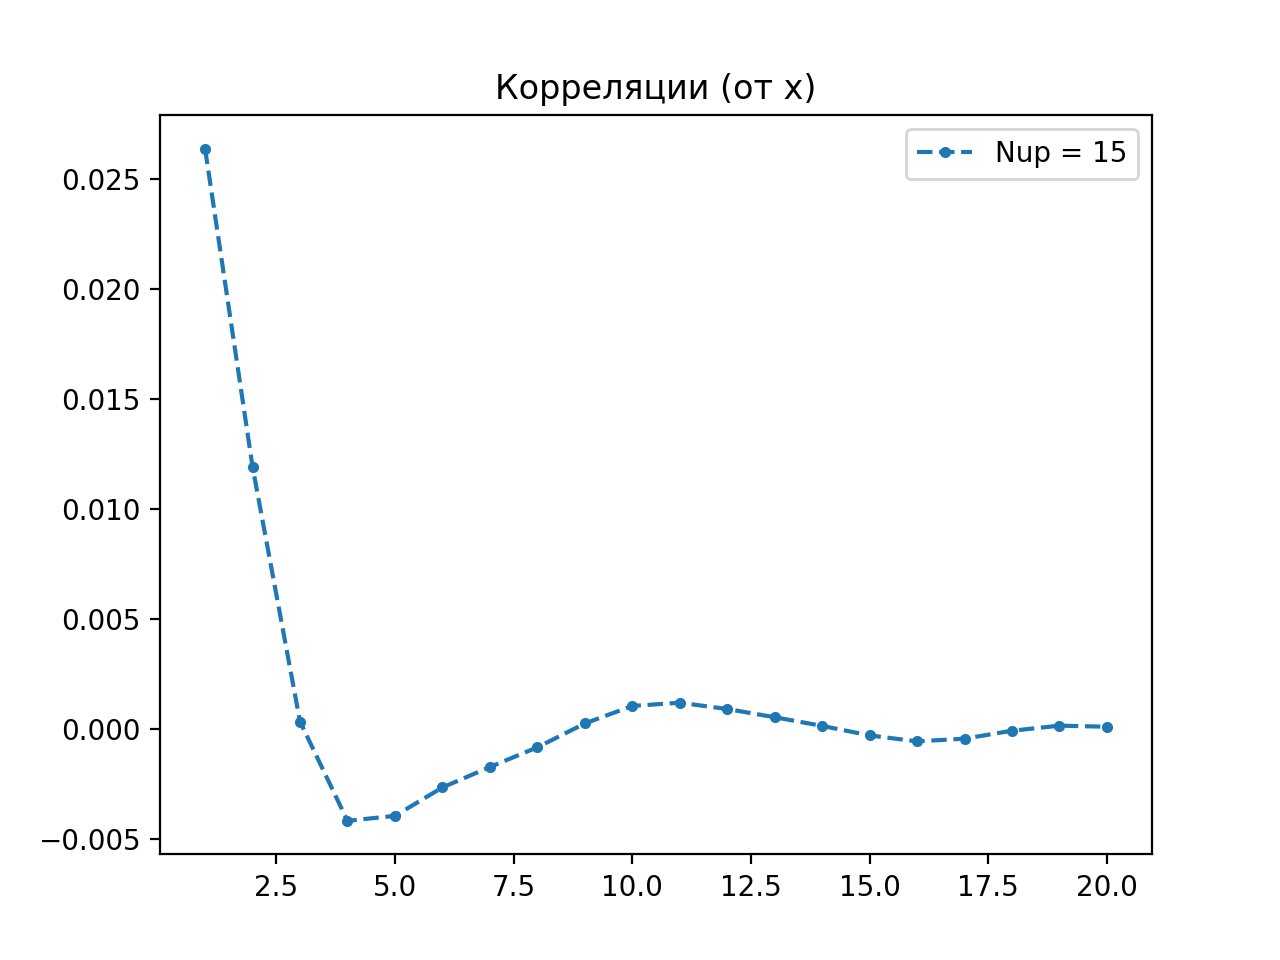

In [34]:
%matplotlib notebook

plt.plot([i+1 for i in range(len(corr15)-1)],
         np.array(corr15).ravel()[1:], '.--', label ='Nup = 15')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('Корреляции (от x)')
plt.legend()

# 1D fourier W = 5, Nup = 15, Ndown = 5

<IPython.core.display.Javascript object>


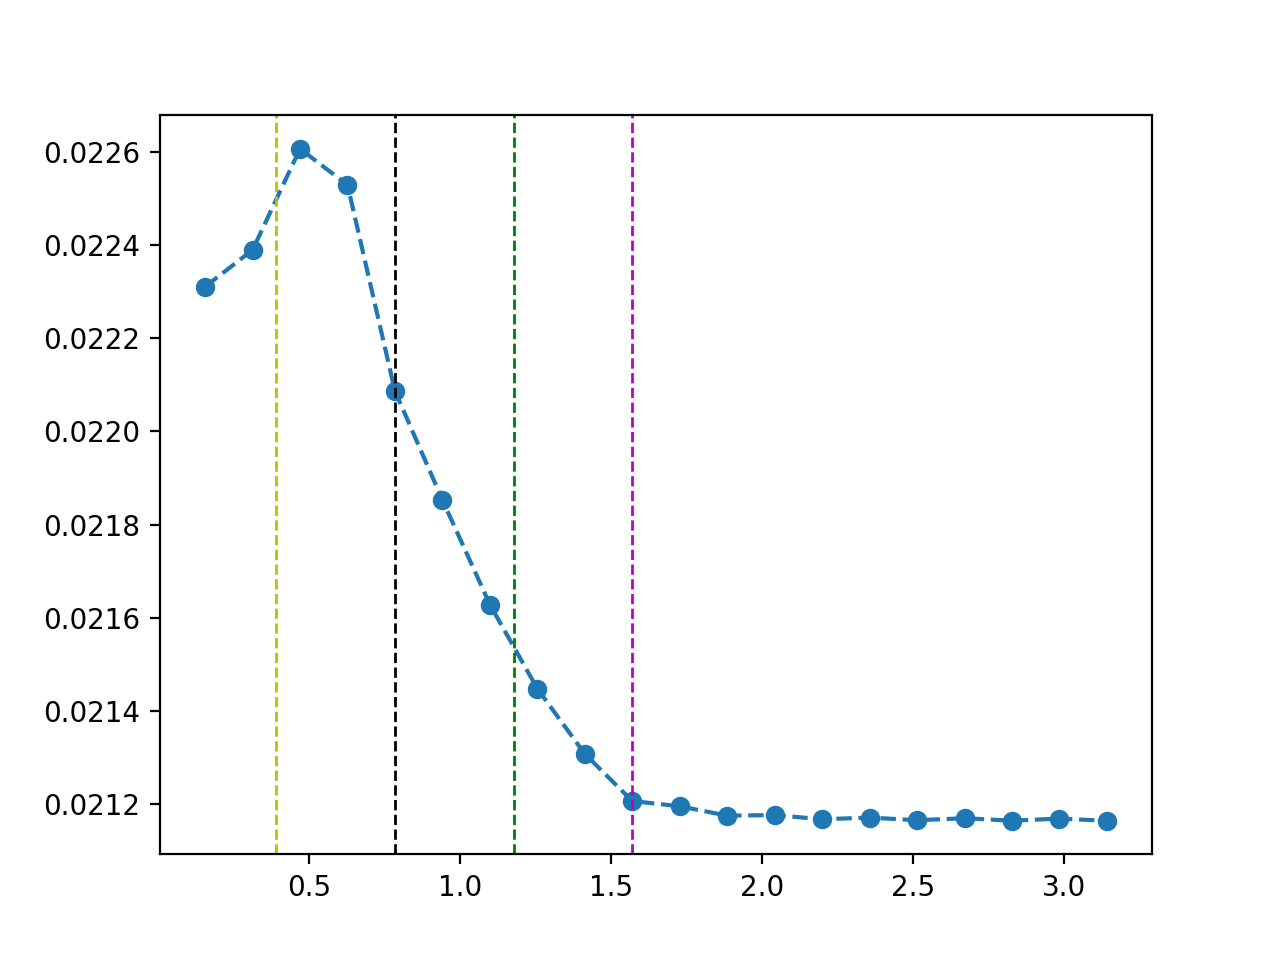

In [38]:
s = fourier(df15_5, ctr)

kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]

%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 15, 5
plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1) #Nup
plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1) #Ndn
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1) #Nup - Ndn
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1) #Nup + Ndn

# 2D fourier W = 5, Nup = 15, Ndown = 5

In [50]:
ss = fourier_2d(df15_5, ctr)

In [51]:
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

In [52]:
len(kx1), len(ky1), len(skxy)

(63, 63, 63)

<IPython.core.display.Javascript object>


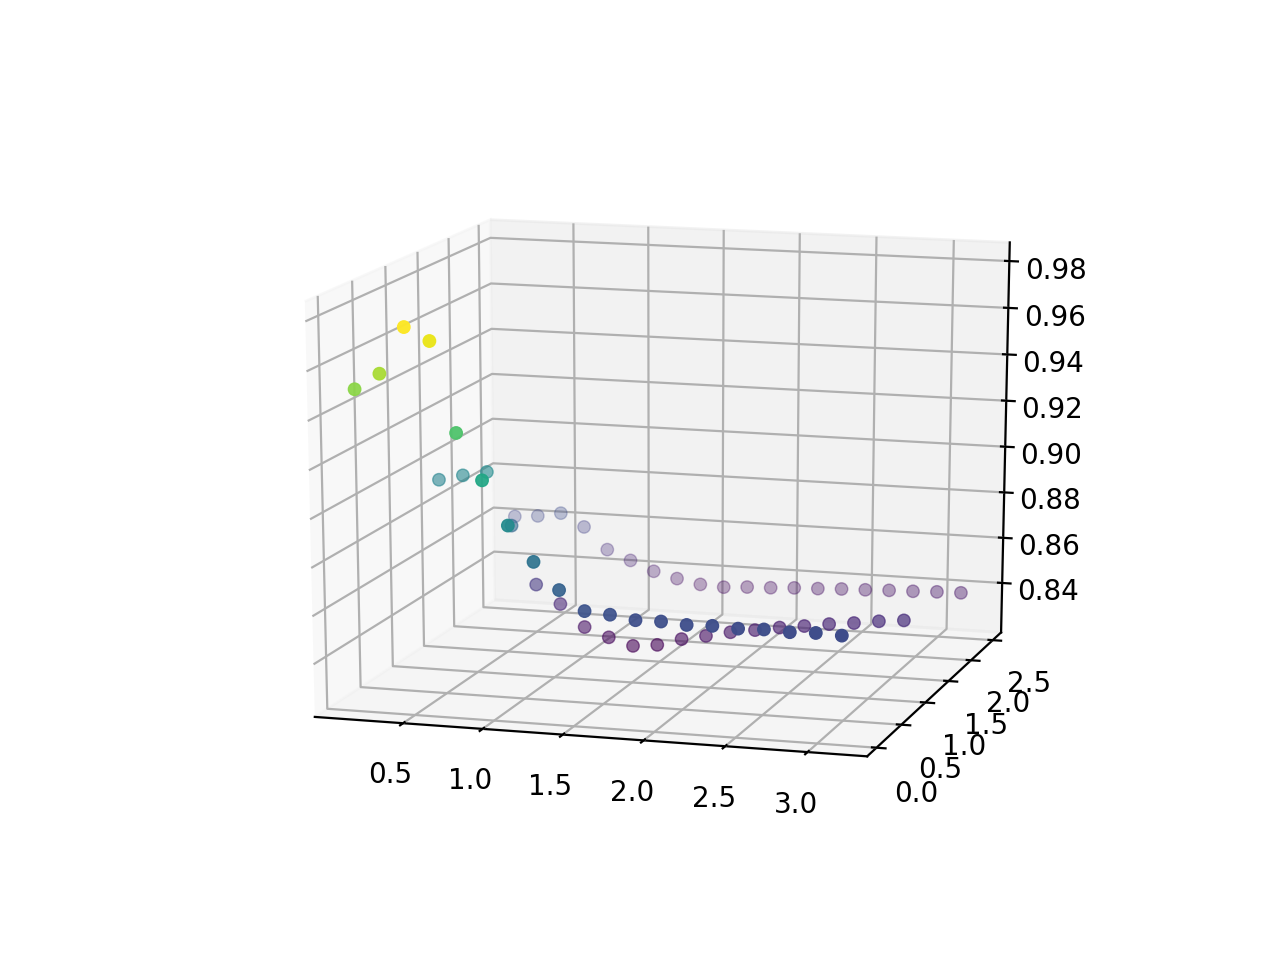

In [53]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[3:], ky1[3:], skxy[3:], 
           c = skxy[3:], 
           cmap='viridis', 
           linewidth=0.5);


# W5, Nup = 19, Ndown = 1, на поляронной линии

In [54]:
df19_1 = file_to_pd('W5_40_19_1_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2


## Нарисуем сами корреляции

<IPython.core.display.Javascript object>


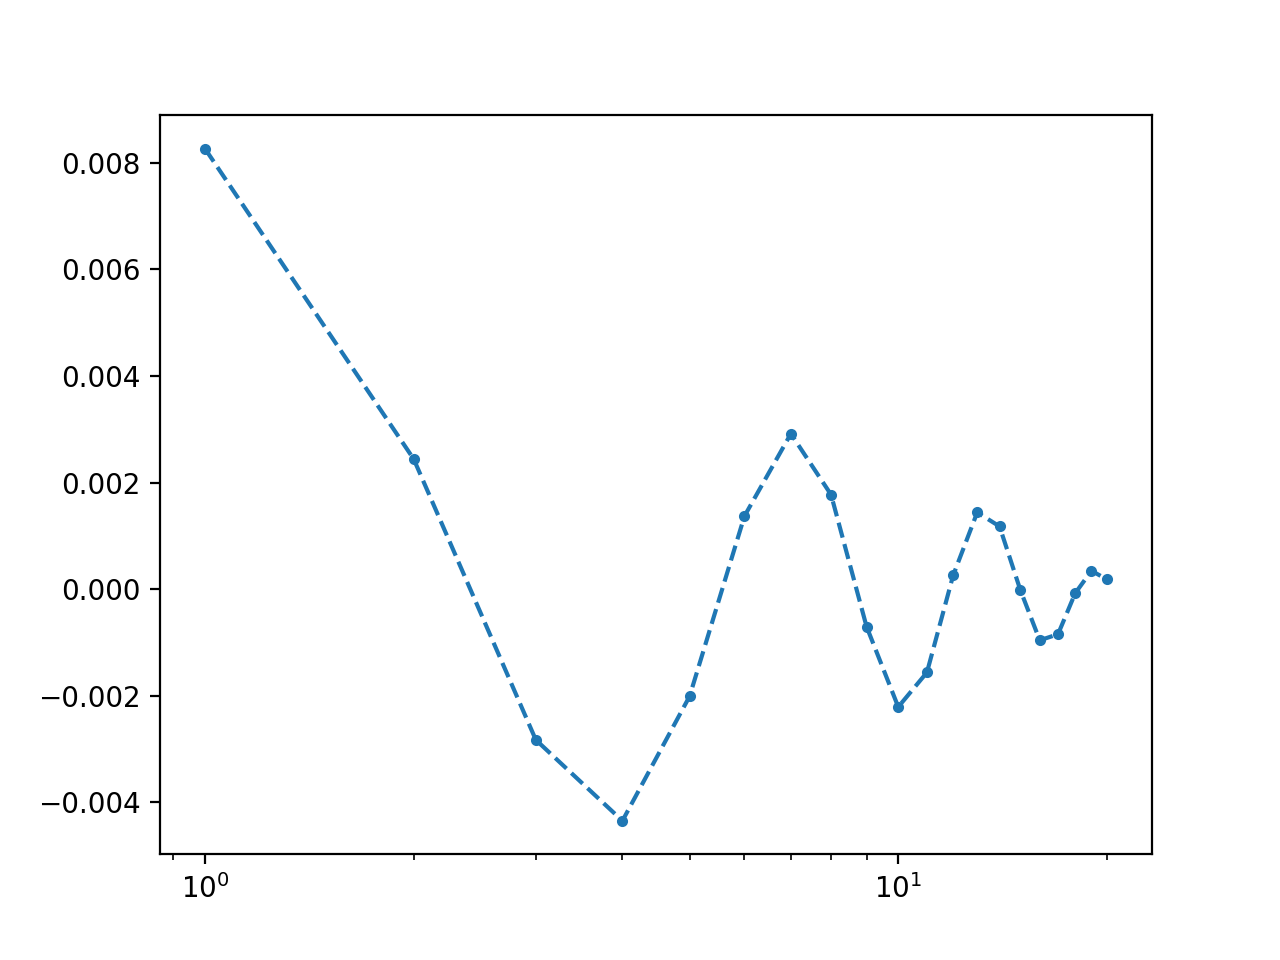

In [55]:
corr = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
%matplotlib notebook
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
plt.xscale('log')
# plt.yscale('log')

In [59]:
corr = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
s = fourier(df19_1, ctr)
kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]


<IPython.core.display.Javascript object>


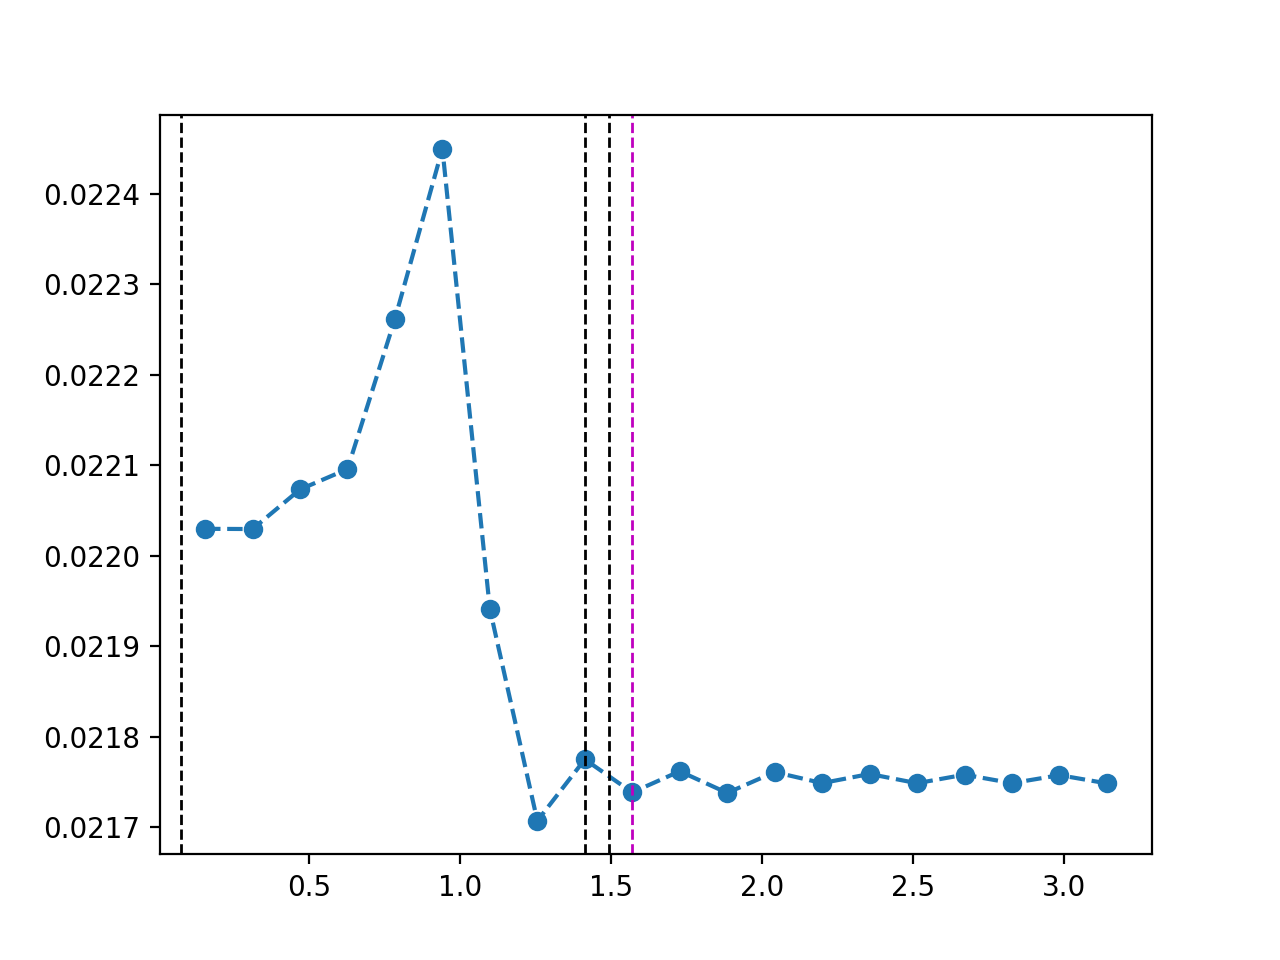

In [64]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 19, 1
plt.axvline(np.pi * (Nup)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

<IPython.core.display.Javascript object>


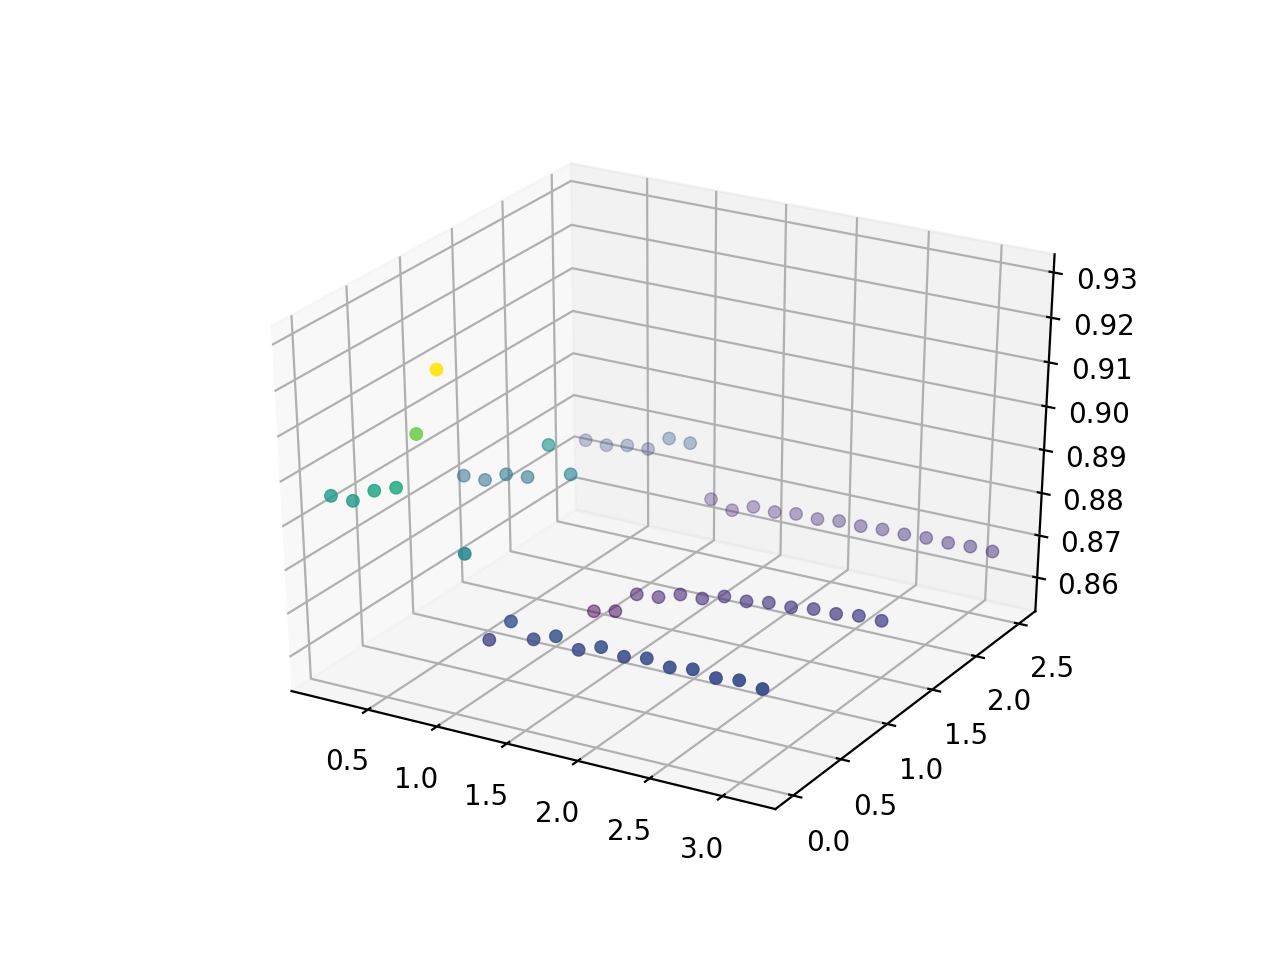

In [65]:
ss = fourier_2d(df19_1, ctr)
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

%matplotlib notebook
ff = plt.axes(projection='3d')
ff.scatter(kx1[3:], ky1[3:], skxy[3:], 
           c = skxy[3:], cmap='viridis', linewidth=0.5);

# W5 Nup = 10, Ndown = 10, BCS

In [72]:
df10_10 = file_to_pd('W5_40_10_10_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2

<IPython.core.display.Javascript object>


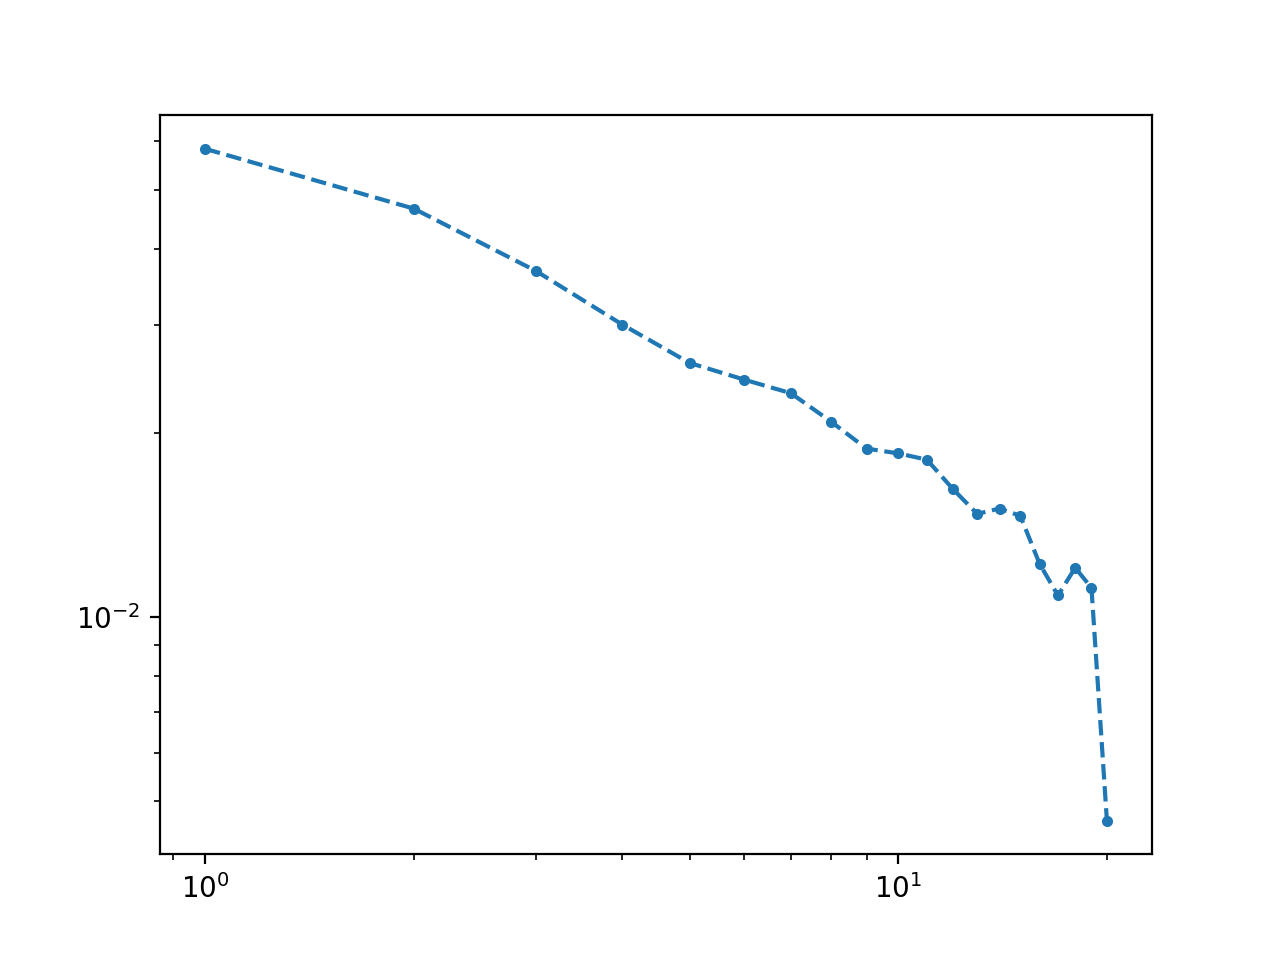

In [73]:
corr = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
%matplotlib notebook
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
plt.xscale('log')
plt.yscale('log')

In [74]:
corr = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
s = fourier(df10_10, ctr)
kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]

<IPython.core.display.Javascript object>


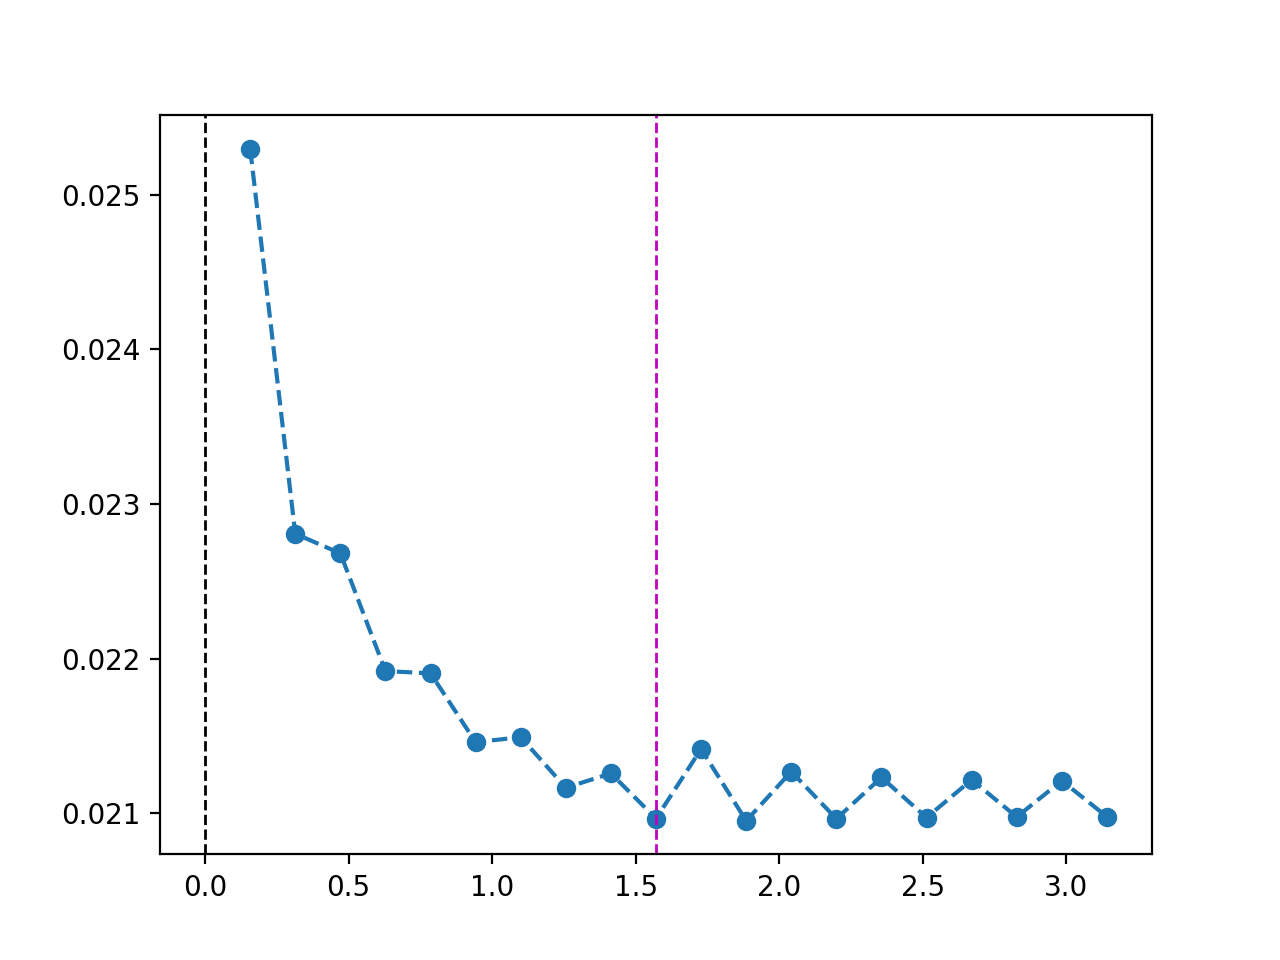

In [75]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 10, 10
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

# 2D Фурье BCS

<IPython.core.display.Javascript object>


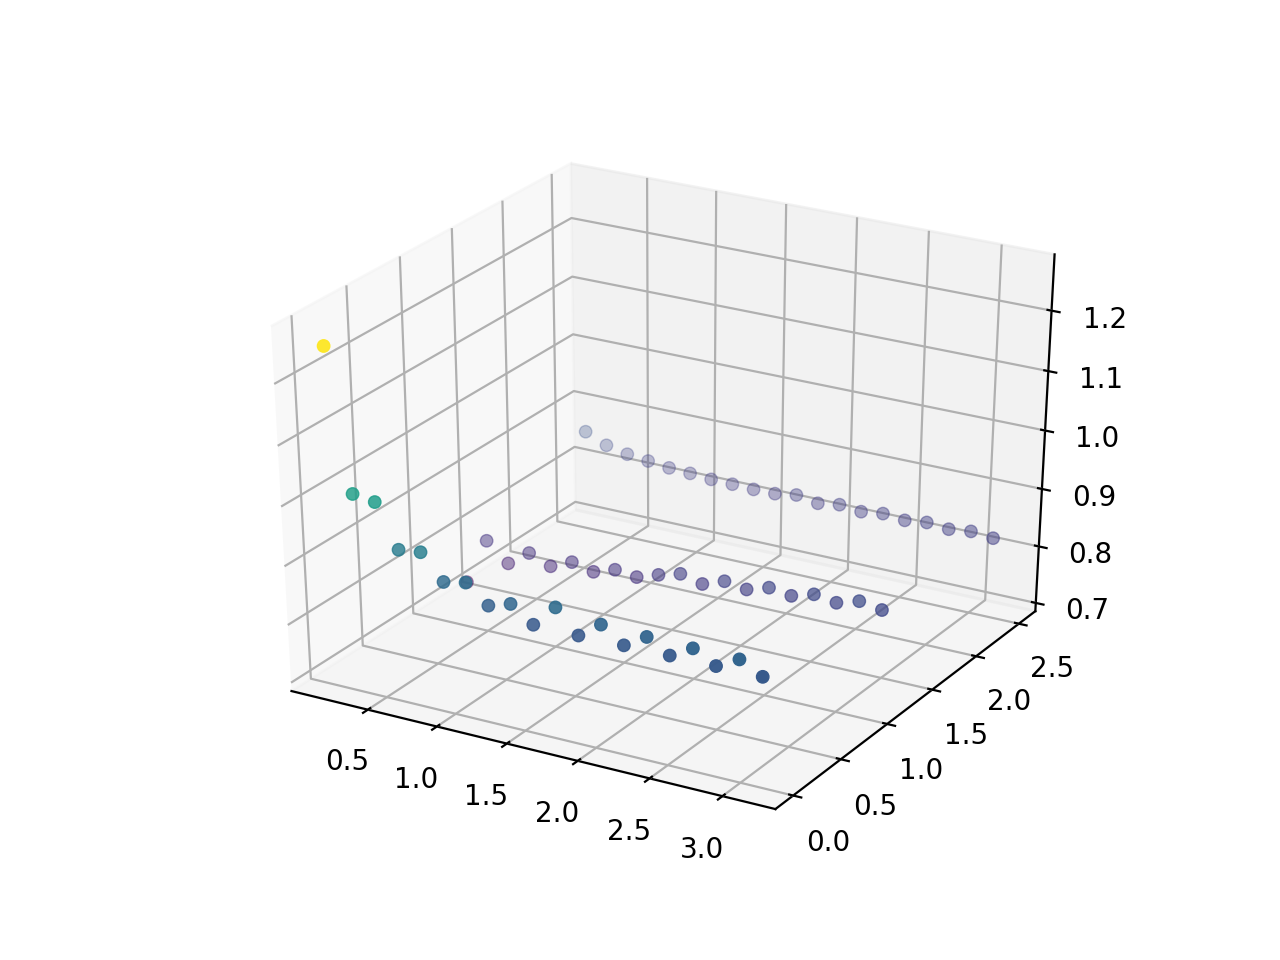

In [76]:
ss = fourier_2d(df10_10, ctr)
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[3:], ky1[3:], skxy[3:], c = skxy[3:], cmap='viridis', linewidth=0.5);

# W5 Nup = 13, Ndown = 7

# W5 Nup = 15, Ndown = 5

# W5 Nup = 17, Ndown = 3

# W5 Nup = 18, Ndown = 2

# W5 Nup = 19, Ndown = 1



In [77]:
W, L = 5, 40
ctr = W * (L//2) - W//2

In [78]:
df13_7 = file_to_pd('W5_40_13_7_superconductive.txt')
df15_5 = file_to_pd('W5_40_15_5_superconductive.txt')
df17_3 = file_to_pd('W5_40_17_3superconductive.txt')
df18_2 = file_to_pd('W5_40_18_2_superconductive.txt')
df19_1 = file_to_pd('W5_40_19_1_superconductive.txt')
df10_10 = file_to_pd('W5_40_10_10_superconductive.txt')

<IPython.core.display.Javascript object>


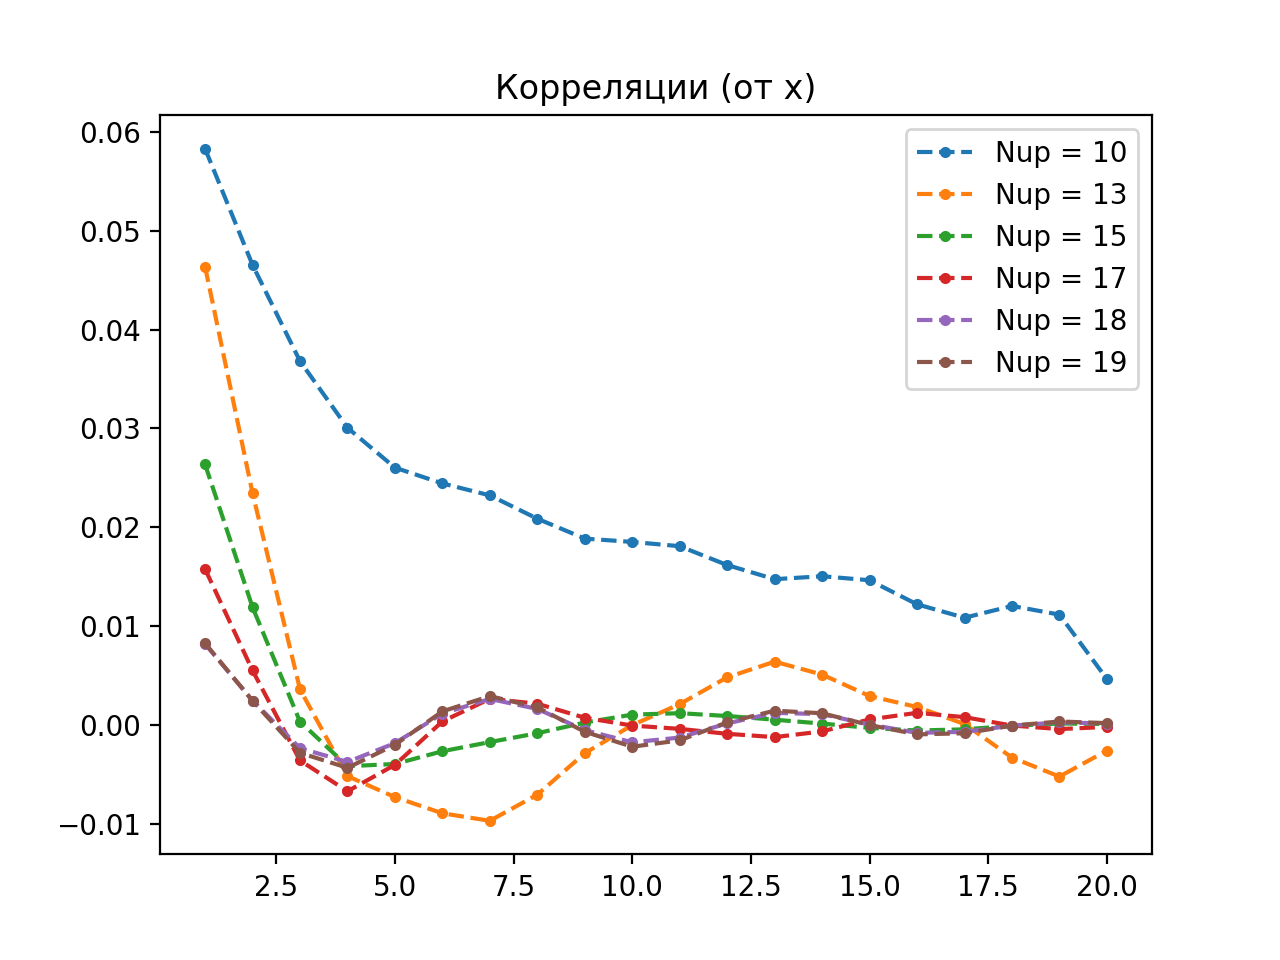

In [79]:
corr13 = [get(df13_7, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr15 = [get(df15_5, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr17 = [get(df17_3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr18 = [get(df18_2, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr19 = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr10 = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]


%matplotlib notebook
plt.plot([i+1 for i in range(len(corr10)-1)],
         np.array(corr10).ravel()[1:], '.--', label ='Nup = 10')
plt.plot([i+1 for i in range(len(corr13)-1)],
         np.array(corr13).ravel()[1:], '.--', label ='Nup = 13')
plt.plot([i+1 for i in range(len(corr15)-1)],
         np.array(corr15).ravel()[1:], '.--', label ='Nup = 15')
plt.plot([i+1 for i in range(len(corr17)-1)],
         np.array(corr17).ravel()[1:], '.--', label ='Nup = 17')
plt.plot([i+1 for i in range(len(corr18)-1)],
         np.array(corr18).ravel()[1:], '.--', label ='Nup = 18')
plt.plot([i+1 for i in range(len(corr19)-1)],
         np.array(corr19).ravel()[1:], '.--', label ='Nup = 19')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('Корреляции (от x)')
plt.legend()

In [390]:
# corr = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
# %matplotlib notebook
# plt.plot([i+1 for i in range(len(corr)-1)],
#          np.array(corr).ravel()[1:], '.--')

In [80]:
# corr17 = [get(df17_3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]

s = fourier(df10_10, ctr)
kx10 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx10 = [s[n_kx] for n_kx in s if n_kx >= 0]

s = fourier(df13_7, ctr)
kx13 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx13 = [s[n_kx] for n_kx in s if n_kx >= 0]

s = fourier(df15_5, ctr)
kx15 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx15 = [s[n_kx] for n_kx in s if n_kx >= 0]

s = fourier(df17_3, ctr)
kx17 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx17 = [s[n_kx] for n_kx in s if n_kx >= 0]

s = fourier(df18_2, ctr)
kx18 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx18 = [s[n_kx] for n_kx in s if n_kx >= 0]

s = fourier(df19_1, ctr)
kx19 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx19 = [s[n_kx] for n_kx in s if n_kx >= 0]

s = fourier(df19_1, ctr)
kx19 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx19 = [s[n_kx] for n_kx in s if n_kx >= 0]

In [351]:
# corr = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
# s = fourier(df19_1, ctr)
# kx19 = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
# skx19 = [s[n_kx] for n_kx in s if n_kx >= 0]

<IPython.core.display.Javascript object>


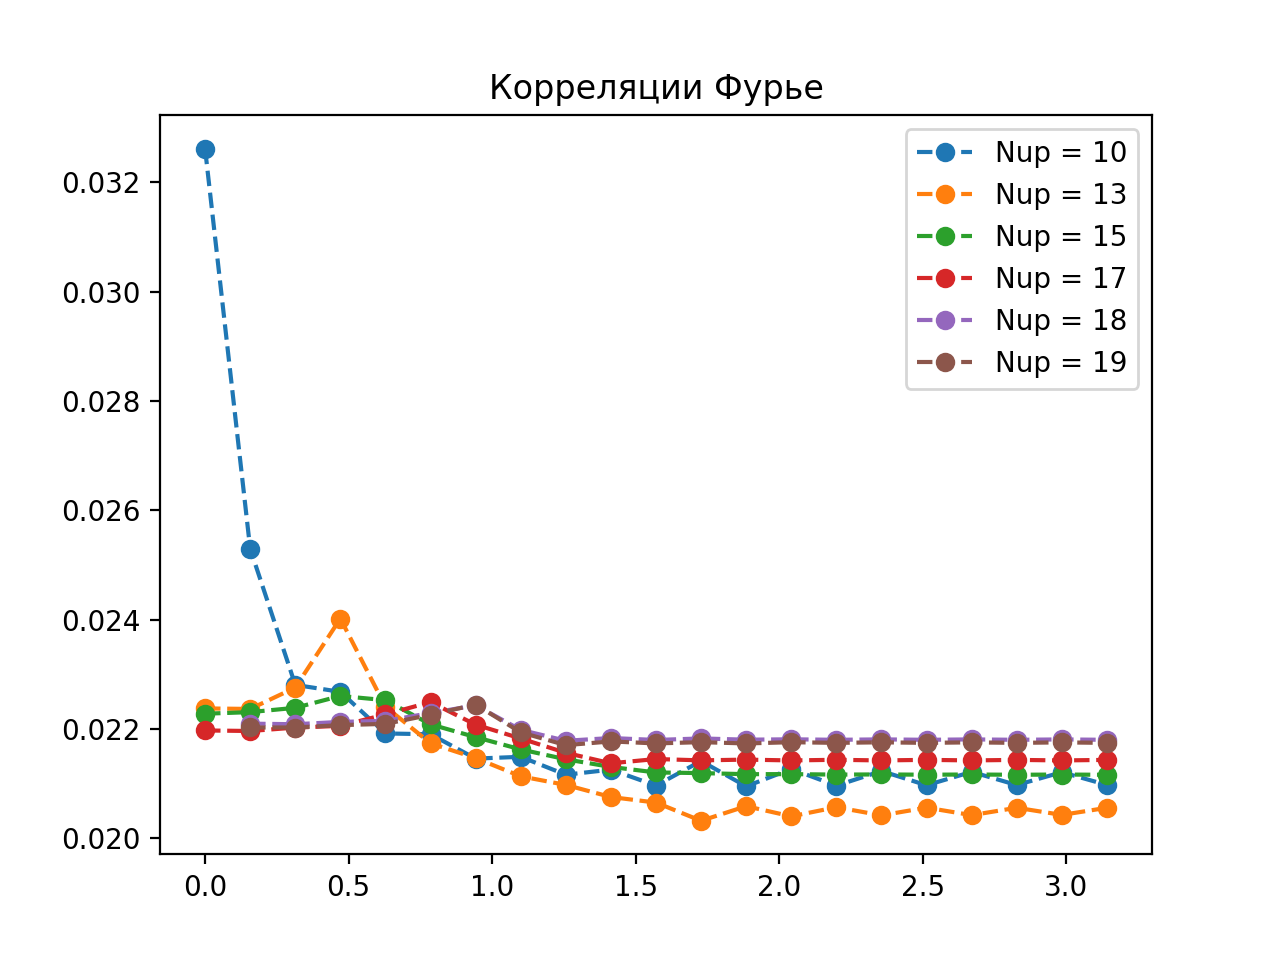

In [81]:
%matplotlib notebook

# import matplotlib.pyplot as plt
plt.plot(kx10[:], skx10[:], 'o--', label = 'Nup = 10')
plt.plot(kx13[:], skx13[:], 'o--', label = 'Nup = 13')
plt.plot(kx15[:], skx15[:], 'o--', label = 'Nup = 15')
plt.plot(kx17[:], skx17[:], 'o--', label = 'Nup = 17')
plt.plot(kx18[1:], skx18[1:], 'o--', label = 'Nup = 18')
plt.plot(kx19[1:], skx19[1:], 'o--', label = 'Nup = 19')
plt.title('Корреляции Фурье')
plt.legend()
# plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1)
# plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1)
# plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
# plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

# !pip install lmfit

Добавил график как в https://arxiv.org/pdf/0707.4172.pdf

<IPython.core.display.Javascript object>


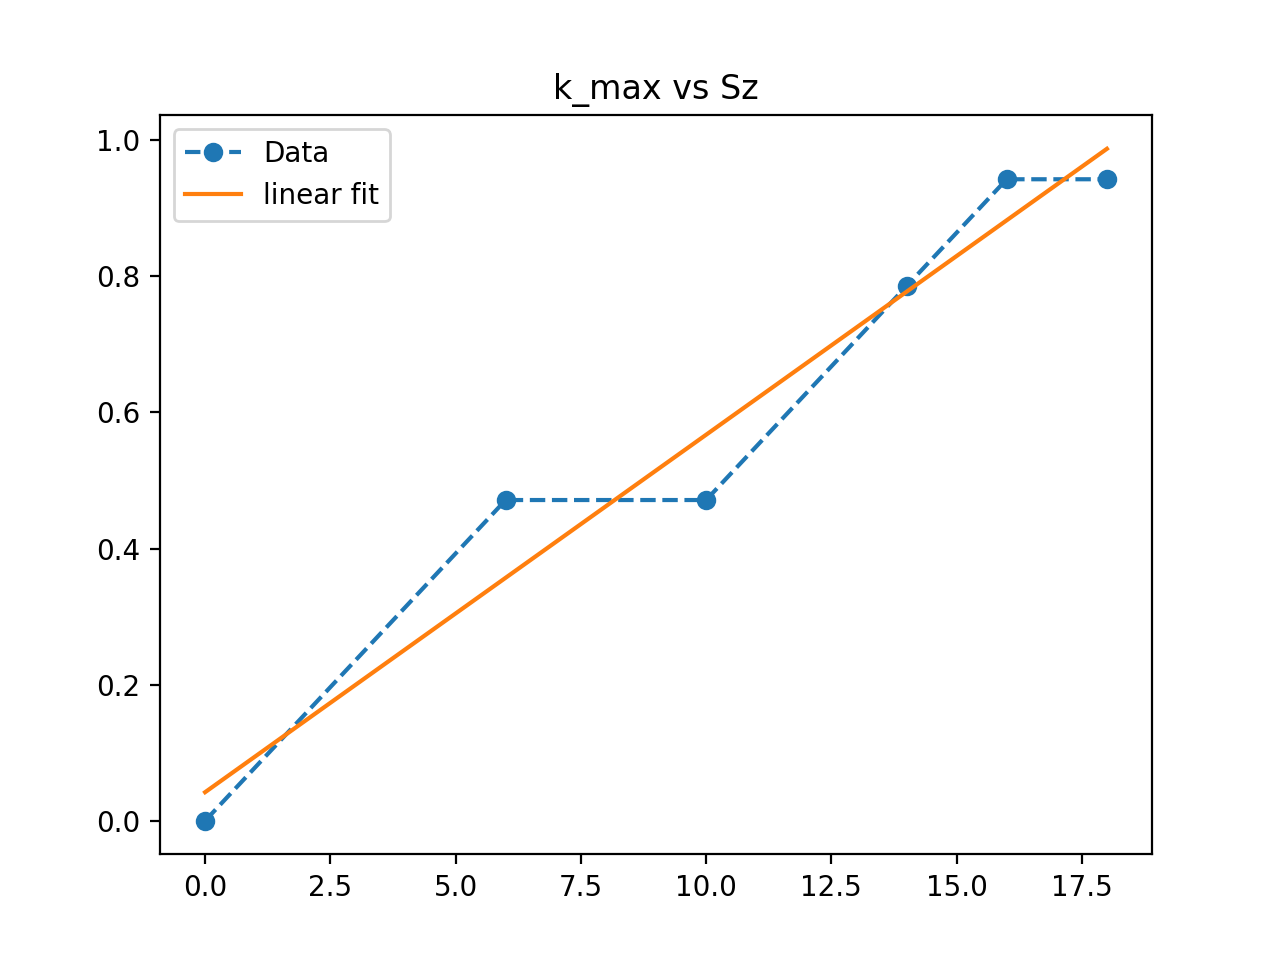

In [82]:
%matplotlib notebook

from lmfit.models import ExpressionModel

def get_peak(k, s):
    return k[:][np.array(s[:]).ravel().argmax()]

kmax = [get_peak(kx10, skx10),get_peak(kx13, skx13),get_peak(kx15, skx15),
 get_peak(kx17, skx17),get_peak(kx18, skx18),get_peak(kx19, skx19)]
sz = [0,6, 10, 14, 16, 18]

mod_kmax = ExpressionModel('a*x+b')

mod_kmax.set_param_hint("a", value=1.0, vary=True)
mod_kmax.set_param_hint("b", value=1.0, vary=True)
params_kmax = mod_kmax.make_params()

result_kmax = mod_kmax.fit(kmax, 
                           params_kmax, 
                           method="leastsq", 
                           x=sz)  # fitting


plt.title('k_max vs Sz')
plt.plot(sz, kmax, 'o--', label = 'Data')
plt.plot(sz, result_kmax.best_fit, '-', label = 'linear fit')
plt.legend()

<IPython.core.display.Javascript object>


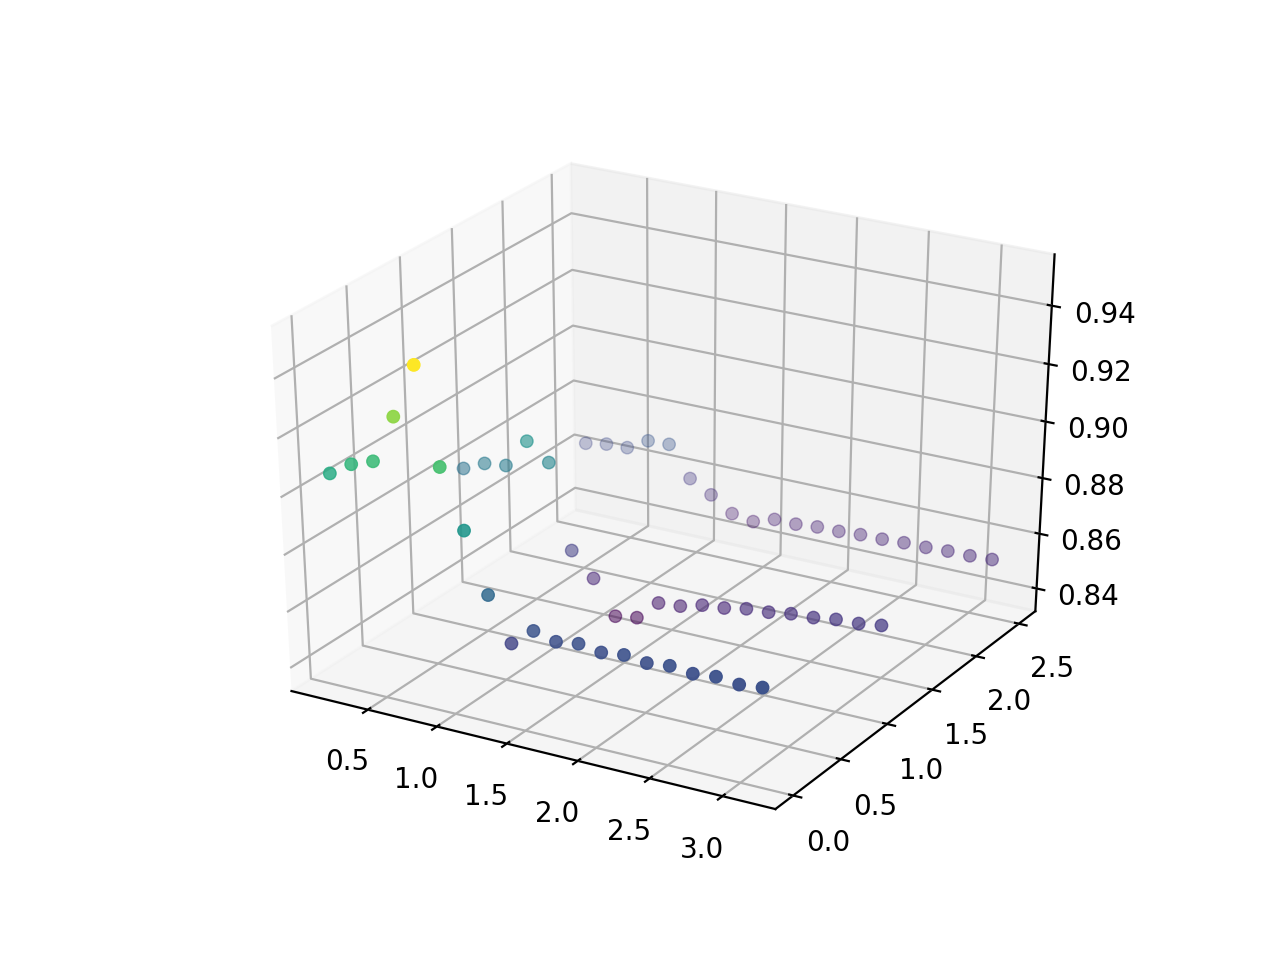

In [84]:
ss = fourier_2d(df17_3, ctr)
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[3:], ky1[3:], skxy[3:], c = skxy[3:], cmap='viridis', linewidth=0.5);